In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
import os
os.listdir()

['.config', 'archive (6).zip', 'sample_data']

In [3]:
import zipfile


with zipfile.ZipFile('/content/archive (6).zip', 'r') as zip_ref:
    zip_ref.extractall()


In [4]:
os.listdir()

['.config',
 'train_u6lujuX_CVtuZ9i.csv',
 'archive (6).zip',
 'test_Y3wMUE5_7gLdaTN.csv',
 'sample_data']

In [5]:
# Load the training dataset
train_df = pd.read_csv('train.csv')

# Load the test dataset
test_df = pd.read_csv('test.csv')

# Display the first few rows of the training dataset
train_df.head()

# Display the first few rows of the test dataset
test_df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
# Summary of the training dataset
train_df.info()

# Check for missing values in the training data
train_df.isnull().sum()

# Summary of the test dataset
test_df.info()

# Check for missing values in the test data
test_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Co

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [34]:
# Load the data
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Perform EDA here
# 1. Basic Descriptive Statistics
print("First few rows of the training dataset:")
print(train_df.head())

print("\nSummary statistics for numerical features in the training data:")
print(train_df.describe())

print("\nSummary statistics for categorical features in the training data:")
print(train_df.describe(include=['O']))

# 2. Checking for Missing Values
print("\nMissing values in each feature (Training Data):")
print(train_df.isnull().sum())

print("\nMissing values in each feature (Test Data):")
print(test_df.isnull().sum())

# 3. Distribution of Numerical Features (add the histogram plots here)
# ...

# 4. Correlation Matrix
# ...

# 5. Distribution of Categorical Features (add the bar plots here)
# ...

# 6. Target Variable Analysis (add the target variable distribution plot here)
# ...

# After EDA, you can proceed with data preprocessing
# Handle missing values
# Encode categorical variables
# Scale features if necessary

# Continue with modeling...


First few rows of the training dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         

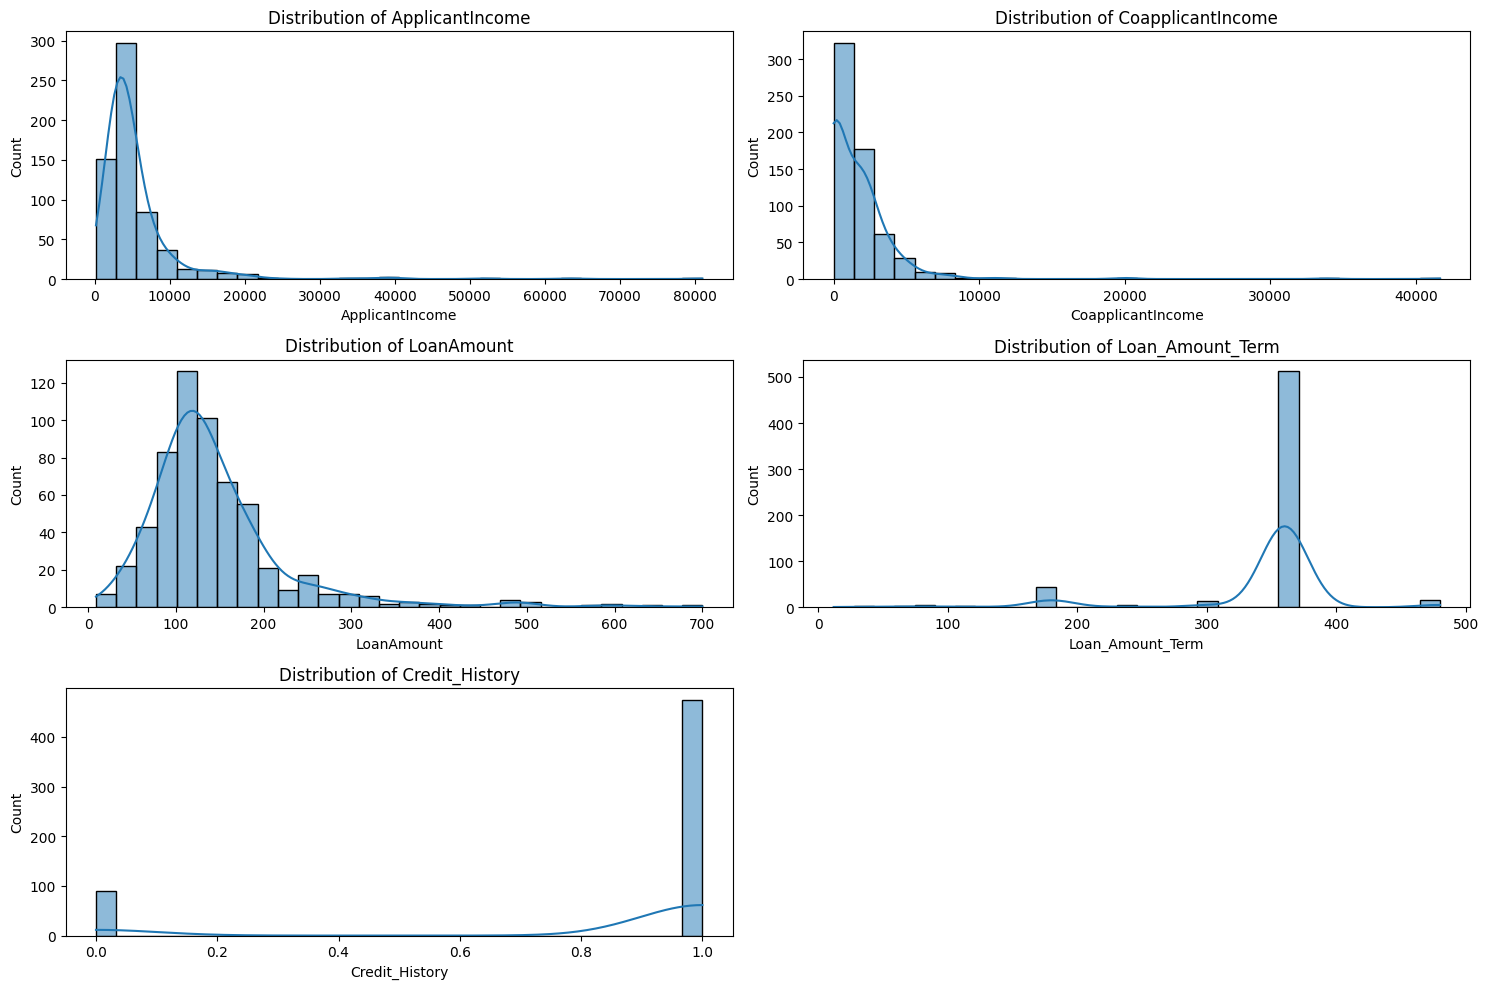

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# List of numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(train_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


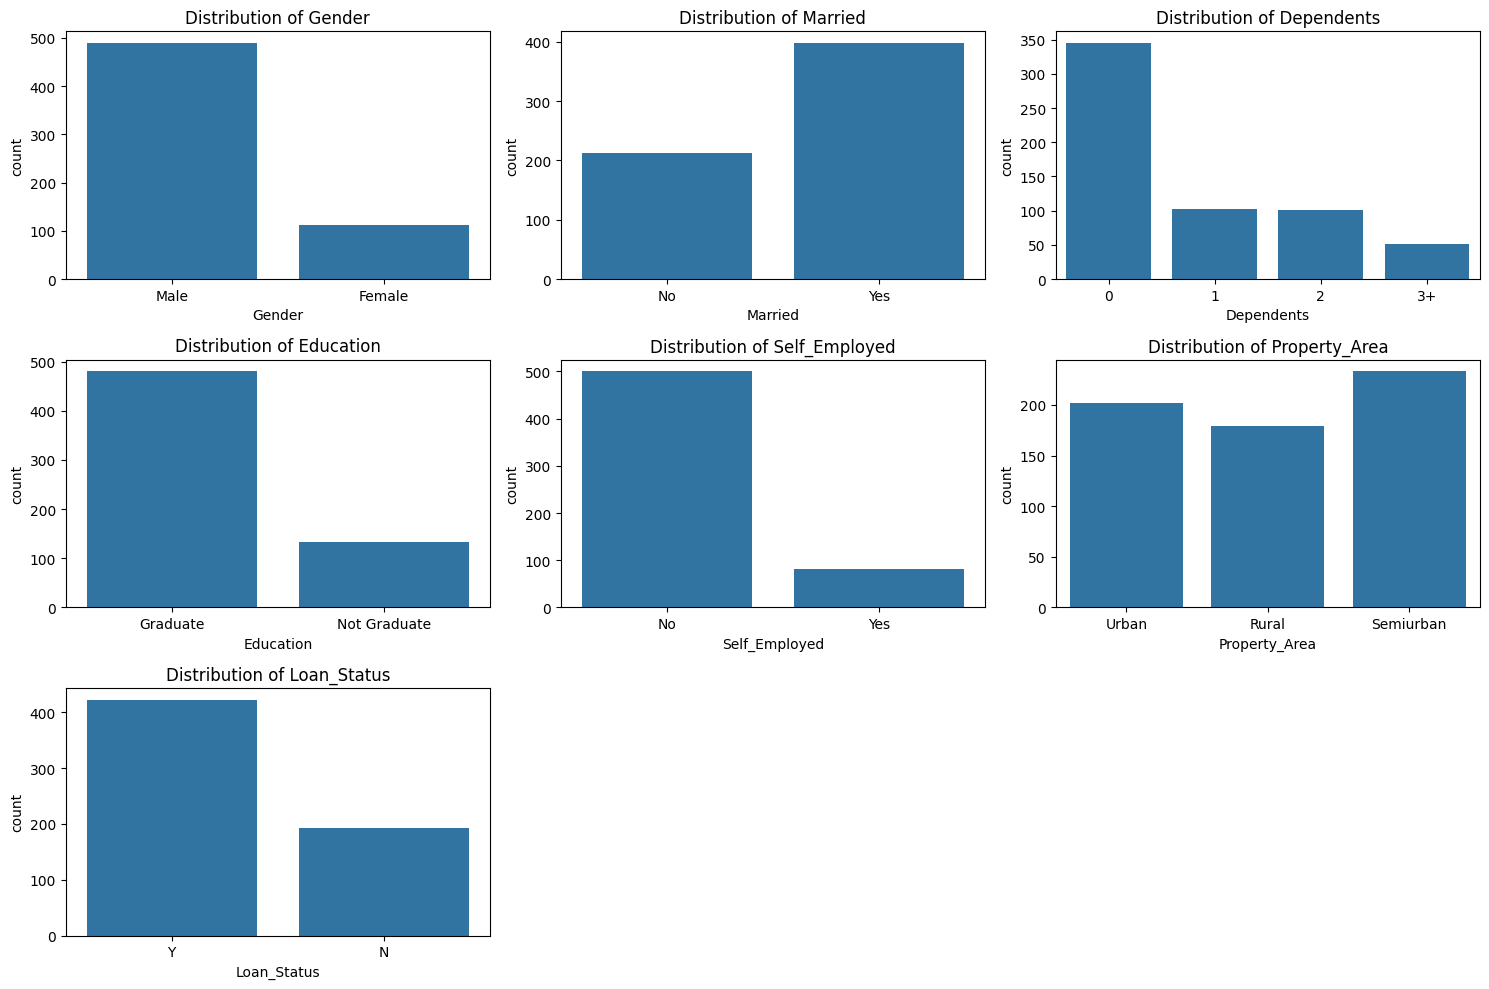

In [36]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# List of categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Plot bar plots for each categorical feature
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=feature, data=train_df)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


In [8]:
# Fill missing values for categorical features with the mode
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)

# Fill missing values for numerical features with the median
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median(), inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)


In [9]:
# Fill missing values for categorical features with the mode
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True)

# Fill missing values for numerical features with the median
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].median(), inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)


In [10]:
# Encode categorical variables in the training data
train_df = pd.get_dummies(train_df, drop_first=True)


In [11]:
# Encode categorical variables in the test data
test_df = pd.get_dummies(test_df, drop_first=True)


In [13]:
# Display the columns in the DataFrame after encoding
print(train_df.columns)



Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')


In [16]:
# Check if 'Loan_Status' is in the columns of the DataFrame
print('Loan_Status' in train_df.columns)

# Display the columns in the DataFrame to confirm
print(train_df.columns)



False
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')


In [17]:
# Load the original training dataset again
original_train_df = pd.read_csv('train.csv')

# Check if 'Loan_Status' is present in the original data
print('Loan_Status' in original_train_df.columns)

# Display the columns in the original DataFrame to confirm
print(original_train_df.columns)


True
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [18]:
# Reload the original training dataset
original_train_df = pd.read_csv('train.csv')

# Ensure 'Loan_Status' is properly encoded as 1 for 'Y' and 0 for 'N'
original_train_df['Loan_Status'] = original_train_df['Loan_Status'].map({'Y': 1, 'N': 0})

# Merge the 'Loan_Status' column back into the processed train_df DataFrame
train_df['Loan_Status'] = original_train_df['Loan_Status']

# Verify the merge by checking the first few rows
print(train_df.head())


   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0             1.0         True        False         False         False   
1             1.0         True         True          True         False   
2             1.0         True         True         False         False   
3             1.0         True         True         False         False   
4             1.0         True        False         False         False   

   Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0          False                   False              False

In [19]:
# Separate features and target variable
X = train_df.drop('Loan_Status', axis=1)
y = train_df['Loan_Status']

# Display the first few rows of features and target variable to verify
print(X.head())
print(y.head())


   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0             1.0         True        False         False         False   
1             1.0         True         True          True         False   
2             1.0         True         True         False         False   
3             1.0         True         True         False         False   
4             1.0         True        False         False         False   

   Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0          False                   False              False

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes to confirm the split
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")


X_train shape: (429, 14)
X_val shape: (185, 14)
y_train shape: (429,)
y_val shape: (185,)


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix:\n', conf_matrix)

# Generate classification report
class_report = classification_report(y_val, y_val_pred)
print('Classification Report:\n', class_report)


Validation Accuracy: 76.76%
Confusion Matrix:
 [[ 29  36]
 [  7 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.45      0.57        65
           1       0.76      0.94      0.84       120

    accuracy                           0.77       185
   macro avg       0.78      0.69      0.71       185
weighted avg       0.77      0.77      0.75       185



In [25]:
# Reload the original test dataset
test_df = pd.read_csv('test.csv')

# Preserve the Loan_ID column separately
loan_ids = test_df['Loan_ID']

# Drop the Loan_ID column from the test_df to avoid issues during preprocessing
test_df = test_df.drop(columns=['Loan_ID'])

# Display the first few rows to verify
test_df.head()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [26]:
# Fill missing values for numerical features with the median
numeric_features = test_df.select_dtypes(include=[np.number]).columns
test_df[numeric_features] = test_df[numeric_features].fillna(test_df[numeric_features].median())

# Fill missing values for categorical features with the mode
categorical_features = test_df.select_dtypes(include=['object']).columns
test_df[categorical_features] = test_df[categorical_features].apply(lambda x: x.fillna(x.mode()[0]))

# Apply one-hot encoding to categorical variables
test_df = pd.get_dummies(test_df, drop_first=True)

# Align the test_df with train_df's features
test_df = test_df.reindex(columns=X.columns, fill_value=0)

# Display the first few rows to verify
test_df.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,True,True,False,False,False,False,False,False,True
1,3076,1500,126.0,360.0,1.0,True,True,True,False,False,False,False,False,True
2,5000,1800,208.0,360.0,1.0,True,True,False,True,False,False,False,False,True
3,2340,2546,100.0,360.0,1.0,True,True,False,True,False,False,False,False,True
4,3276,0,78.0,360.0,1.0,True,False,False,False,False,True,False,False,True


In [27]:
# Predict on the processed test set
test_predictions = model.predict(test_df)

# Prepare the submission DataFrame
submission = pd.DataFrame({'Loan_ID': loan_ids, 'Loan_Status': test_predictions})

# Convert predictions back to original labels ('Y' for 1 and 'N' for 0)
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

# Save the submission file
submission.to_csv('loan_prediction_submission.csv', index=False)

# Display the first few rows of the submission file to verify
submission.head()


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix:\n', conf_matrix)

# Generate classification report
class_report = classification_report(y_val, y_val_pred)
print('Classification Report:\n', class_report)


Validation Accuracy: 76.76%
Confusion Matrix:
 [[ 29  36]
 [  7 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.45      0.57        65
           1       0.76      0.94      0.84       120

    accuracy                           0.77       185
   macro avg       0.78      0.69      0.71       185
weighted avg       0.77      0.77      0.75       185



In [29]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Display cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean() * 100:.2f}%")


Cross-Validation Scores: [0.79674797 0.74796748 0.76422764 0.80487805 0.81967213]
Mean CV Accuracy: 78.67%


In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Best score
print(f"Best Cross-Validation Score: {grid_search.best_score_ * 100:.2f}%")


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 82.28%


In [31]:
# Re-train the model on the entire training set
final_model = RandomForestClassifier(random_state=42, **grid_search.best_params_)
final_model.fit(X, y)

# Make final predictions on the test set
final_test_predictions = final_model.predict(test_df)

# Prepare the final submission DataFrame
final_submission = pd.DataFrame({'Loan_ID': loan_ids, 'Loan_Status': final_test_predictions})

# Convert predictions to 'Y'/'N'
final_submission['Loan_Status'] = final_submission['Loan_Status'].map({1: 'Y', 0: 'N'})

# Save the final submission file
final_submission.to_csv('final_loan_prediction_submission.csv', index=False)


In [32]:
# Retrain the RandomForest model using the best parameters
best_params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
final_model = RandomForestClassifier(random_state=42, **best_params)
final_model.fit(X, y)

# Predict on the validation set to see how the model performs with the best parameters
y_val_pred = final_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy with Best Params: {accuracy * 100:.2f}%')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix with Best Params:\n', conf_matrix)

# Generate classification report
class_report = classification_report(y_val, y_val_pred)
print('Classification Report with Best Params:\n', class_report)


Validation Accuracy with Best Params: 100.00%
Confusion Matrix with Best Params:
 [[ 65   0]
 [  0 120]]
Classification Report with Best Params:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       120

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



In [33]:
# Predict on the test set
final_test_predictions = final_model.predict(test_df)

# Prepare the final submission DataFrame
final_submission = pd.DataFrame({'Loan_ID': loan_ids, 'Loan_Status': final_test_predictions})

# Convert predictions back to original labels ('Y' for 1 and 'N' for 0)
final_submission['Loan_Status'] = final_submission['Loan_Status'].map({1: 'Y', 0: 'N'})

# Save the final submission file
final_submission.to_csv('final_loan_prediction_submission.csv', index=False)

# Display the first few rows of the submission file to verify
print(final_submission.head())


    Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           N


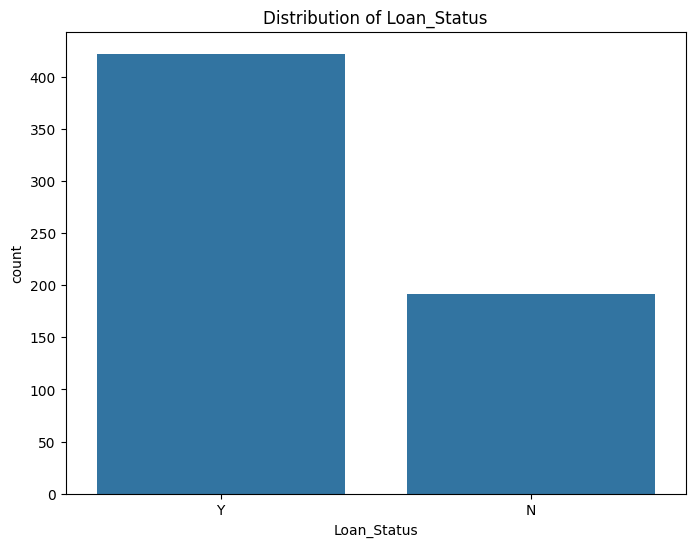

In [38]:
# Bar plot for Loan_Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=train_df)
plt.title('Distribution of Loan_Status')
plt.show()


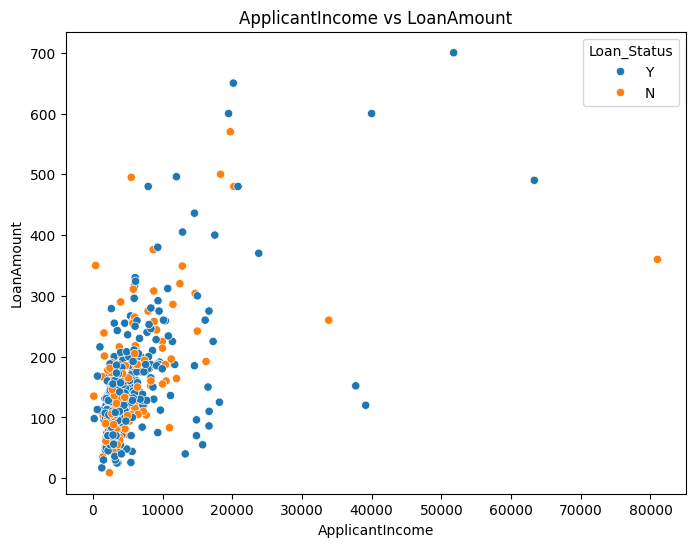

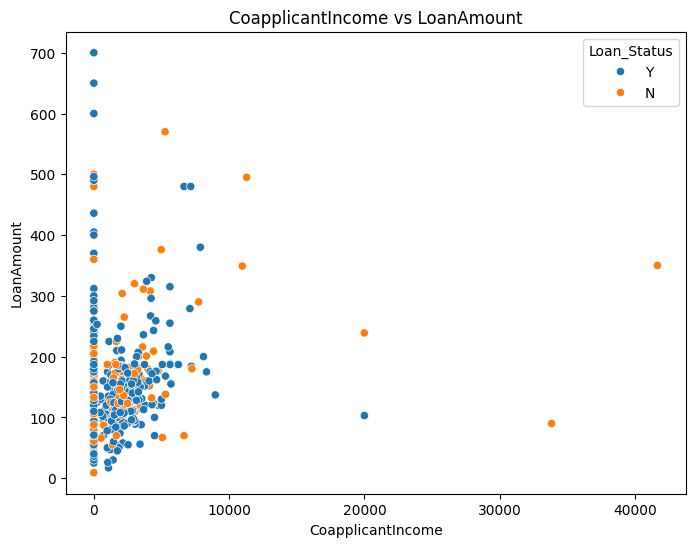

In [39]:
# Scatter plot for ApplicantIncome vs. LoanAmount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=train_df)
plt.title('ApplicantIncome vs LoanAmount')
plt.show()

# Scatter plot for CoapplicantIncome vs. LoanAmount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', hue='Loan_Status', data=train_df)
plt.title('CoapplicantIncome vs LoanAmount')
plt.show()


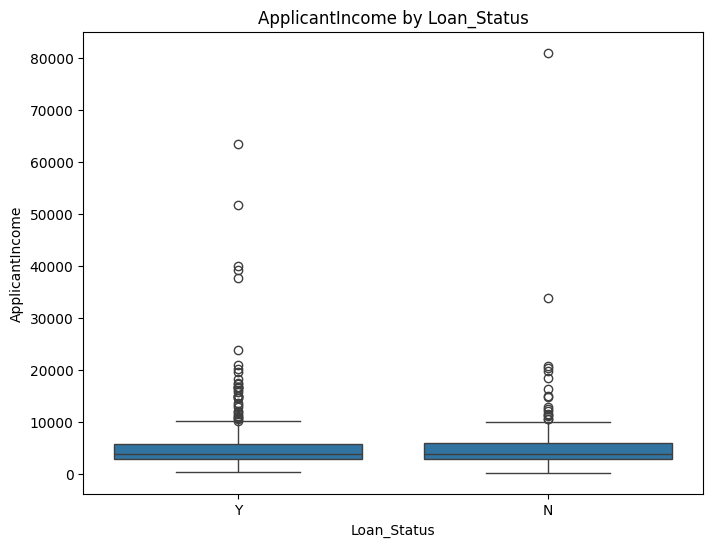

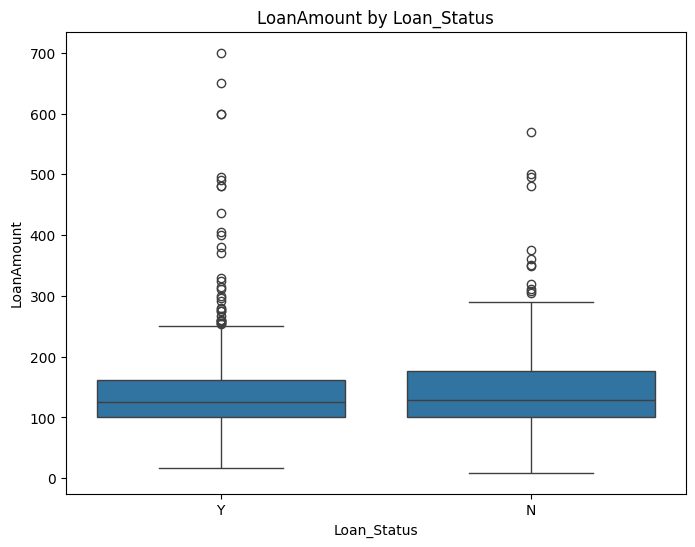

In [40]:
# Boxplot for ApplicantIncome by Loan_Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=train_df)
plt.title('ApplicantIncome by Loan_Status')
plt.show()

# Boxplot for LoanAmount by Loan_Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train_df)
plt.title('LoanAmount by Loan_Status')
plt.show()
